# Motivação Hipotética: DataSciencester

## Encontrando Conectores-Chave

Dados de usuários e dados de amizades


In [3]:
users = [ 
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}]

friendship_pairs = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

    

Criaremos um dict para pesquisar uma amizade mais rapidamente

In [4]:
friendships = {user["id"] : [] for user in users}

for i,j in friendship_pairs:

    friendships[i].append(j)
    friendships[j].append(i)

### Número Total de Conexões

In [5]:
def number_of_friends(user):
    user_id = user["id"]
    friends_ids = friendships[user_id]
    return len(friends_ids)

total_connections = sum(number_of_friends(user) for user in users)

In [6]:
total_connections

24

In [7]:
num_users = len(users)
avg_conections = total_connections / num_users

print(num_users , avg_conections)

10 2.4


In [8]:
#crie uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse = True)

### Cientistas de dados que vocẽ talvez conheça

Primeira ideia é sugerir os amigos dos amigos

In [9]:
def foaf_ids_bad(user):
    return[foaf_id 
           for friend_id in friendships[user["id"]]
           for foaf_id in friendships[friend_id]]

In [10]:
foaf_ids_bad(users[0])


[0, 2, 3, 0, 1, 3]

Vamos gerar uma contagem de amigos em comum, porém excluindo as pessoas que o usuário já conhece

In [11]:
from collections import Counter

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


### Interesses

In [12]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), 
    (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"),
    (3, "R"), (3, "Python"), (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"), (4, "libsvm"),
    (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"),
    (6, "statistics"), (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


### Função Para encontrar usuários com o mesmo interesse

In [13]:
def data_scientists_who_like(target_interest):
    return[user_id for user_id, user_interest in interests
           if user_interest == target_interest]

##### Indice Interesse para Usuário

In [14]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

##### Indice Usuário por interesse

In [15]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [16]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

### Salarios e Experiencia

In [17]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1), 
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000 ,7.5), 
                        (60000, 2.5), (83000, 10), 
                        (48000, 1.9), (63000, 4.2)]


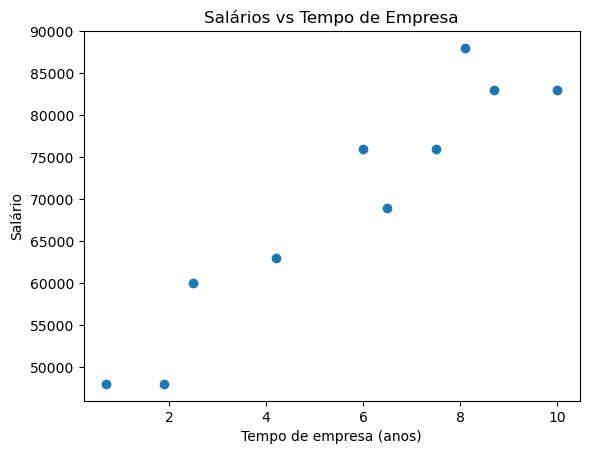

In [18]:
from matplotlib import pyplot as plt

# separando em dois vetores
salaries = [salary for salary, tenure in salaries_and_tenures]
tenures = [tenure for salary, tenure in salaries_and_tenures]

plt.scatter(tenures, salaries)
plt.xlabel("Tempo de empresa (anos)")
plt.ylabel("Salário")
plt.title("Salários vs Tempo de Empresa")
plt.show()

In [19]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure: sum(salaries)/ len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
    

In [21]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [22]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "menos que dois"
    elif tenure < 5:
        return "entre dois e cinco"
    else:
        return "mais que cinco"

In [23]:
# As chaves são buckets de anos de experiencia, os valores sõ as listas de salários associadas ao bucket em questão
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [25]:
#Finalmente computamos a média salarial de cada grupo:
#As chaves são buckets de anos de experiencia, os valores são a média salarial do bucket em questão

averagy_salary_by_bucket = {
    tenure_bucket: sum(salaries)/len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()}

In [26]:
averagy_salary_by_bucket

{'mais que cinco': 79166.66666666667,
 'menos que dois': 48000.0,
 'entre dois e cinco': 61500.0}

### Contas Pagas

In [27]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

### Topico de Interesse